In [18]:
import torch
import corner
import numpy as np
import pylab as plt
from swyft.intensity import BallMask, ComboMask, Prior1d, Prior, Intensity
from tqdm import tqdm
import swyft
import swyft.plot
from swyft.network import DefaultHead, DefaultTail
from swyft import Points, RatioEstimator

DEVICE = 'cuda'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def model(par):
    return dict(spec=np.linspace(0, 3, 5)*par['A']+par['B'])

def noise(obs, par):
    obs['spec'] += np.random.randn(*obs['spec'].shape)*0.1
    return obs

In [3]:
par0 = dict(A=1., B=1.)
obs0 = noise(model(par0), par0)

In [4]:
class Hooft(swyft.Module):
    def __init__(self, obs_shapes, factor = 1.):
        super().__init__(factor = factor)
        self.factor = factor
    
    def forward(self, x):
        return x['spec']

In [9]:
cache = swyft.MemoryCache(params = ["A", "B"], obs_shapes = {"spec": (5,)})
#cache = swyft.DirectoryCache(params = ["A", "B"], obs_shapes = {"spec": (5,)}, path = "/home/weniger/zarr_test4")

Creating new cache.


In [10]:
prior = Prior({"A": ["normal", 0., 1.], "B": ["normal",  0., 1.]})

In [14]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)
s.infer1d(Ninit = 500)

Simulate:   8%|▊         | 44/522 [00:00<00:01, 432.14it/s]

N = 500
Round: 1
Adding 522 new samples. Run simulator!


Simulate: 100%|██████████| 522/522 [00:01<00:00, 434.82it/s]


n_features = 5
Start training
LR iteration 0
Validation loss: 2.755168768075796
Validation loss: 2.088853432581975
Validation loss: 1.3143140444388757
Validation loss: 1.0841879019370446
Validation loss: 0.9761858376172873
Validation loss: 0.9398770607434787
Validation loss: 0.9172866023503817
Validation loss: 0.895025237248494
Validation loss: 0.8212135113202609
Validation loss: 0.8382806915503281
Total epochs: 10
LR iteration 1
Validation loss: 0.8379847613664774
Validation loss: 0.7452999433645835
Validation loss: 0.8542032058422382
Total epochs: 3


Simulate:  10%|█         | 45/432 [00:00<00:00, 442.40it/s]

Volume shrinkage: 0.3315695601081648
N = 582
Round: 2
Adding 432 new samples. Run simulator!


Simulate: 100%|██████████| 432/432 [00:00<00:00, 438.20it/s]


n_features = 5
Start training
LR iteration 0
Validation loss: 2.5122687180836993
Validation loss: 1.5284829616546631
Validation loss: 1.2308250268300374
Validation loss: 1.1360939025878907
Validation loss: 1.0663911283016205
Validation loss: 0.9943167785803477
Validation loss: 1.0976780354976654
Total epochs: 7
LR iteration 1
Validation loss: 1.020782474676768
Validation loss: 0.9928326427936554
Validation loss: 1.0402591109275818
Total epochs: 3


Simulate:   0%|          | 0/418 [00:00<?, ?it/s]

Volume shrinkage: 0.4728680563105097
N = 719
Round: 3
Adding 418 new samples. Run simulator!


Simulate: 100%|██████████| 418/418 [00:00<00:00, 533.54it/s]


n_features = 5
Start training
LR iteration 0
Validation loss: 2.549087776857264
Validation loss: 1.8179858747650595
Validation loss: 1.4729697564068962
Validation loss: 1.274478323319379
Validation loss: 1.2001839245066923
Validation loss: 1.2657518492025488
Total epochs: 6
LR iteration 1
Validation loss: 1.1676097494714401
Validation loss: 1.2130865787758547
Total epochs: 2
Volume shrinkage: 0.9994755536750899


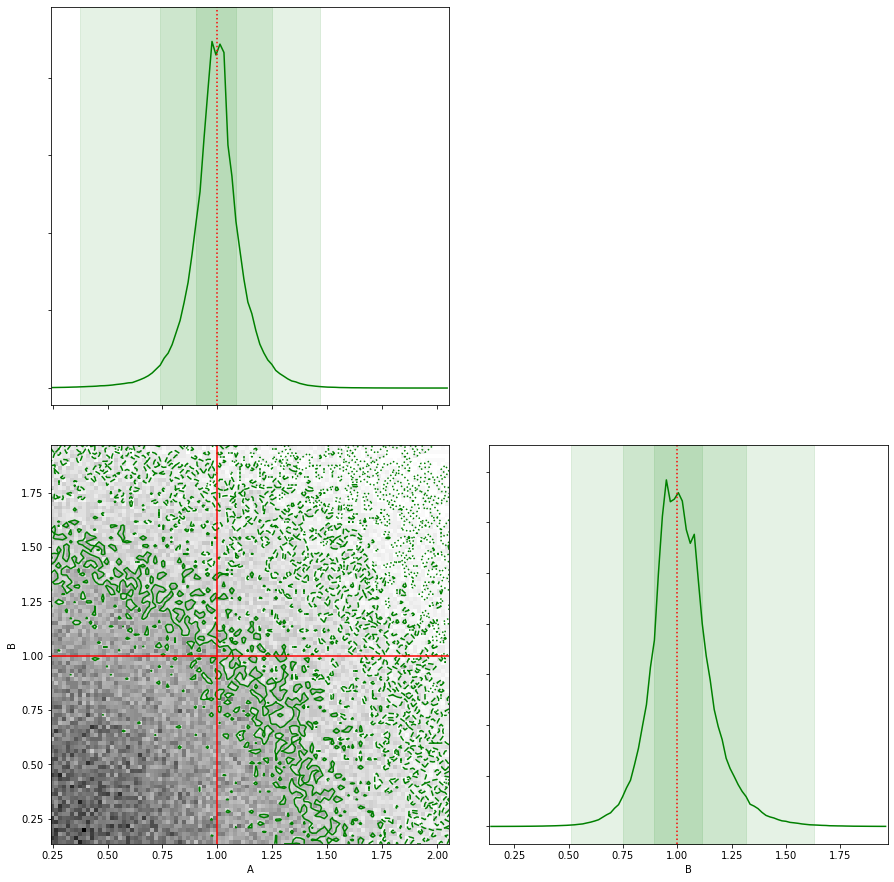

In [19]:
post = s.posteriors()
swyft.corner(post, ["A", "B"], color='g', figsize = (15,15), truth=par0)

In [1]:
s.infer2d()

NameError: name 's' is not defined

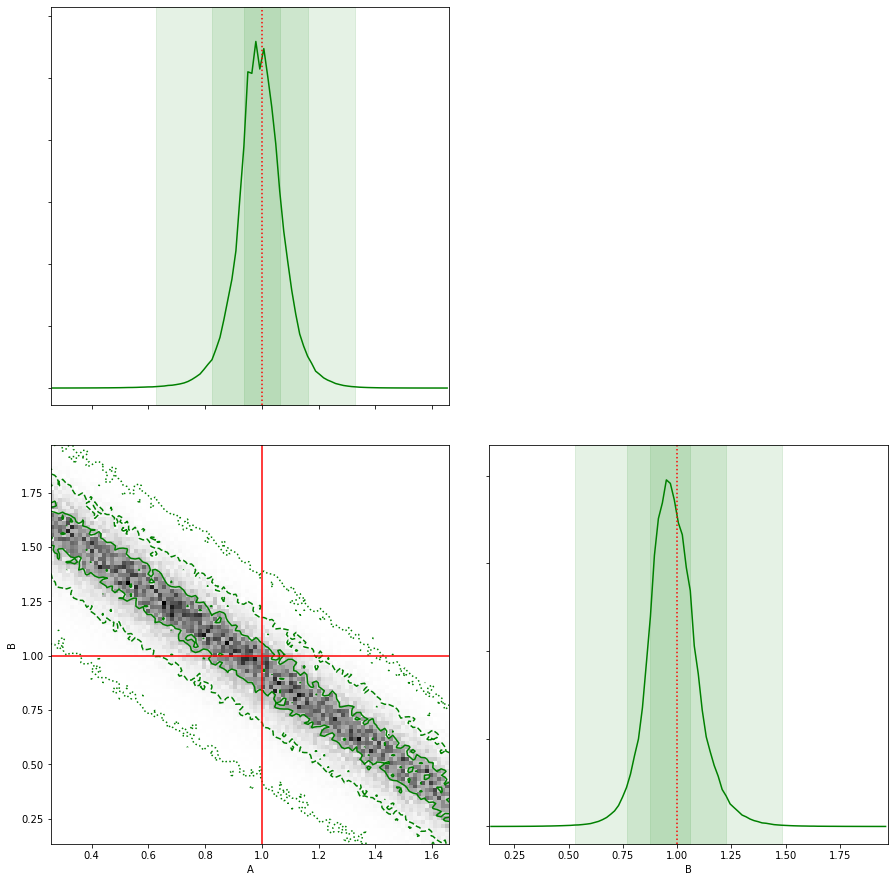

In [22]:
post = s.posteriors()
swyft.corner(post, ["A", "B"], color='g', figsize = (15,15), truth=par0)

In [25]:
len(s)

3

In [24]:
s.pop()